# Classification

<img src="https://thumbs.dreamstime.com/b/online-money-transfer-vector-illustration-cartoon-flat-tiny-friend-man-character-transferring-send-transaction-coin-out-178490363.jpg" width=700>

### Dataset Download  
You can download the CSV file here:  
[https://www.kaggle.com/competitions/santander-customer-transaction-prediction)

### Introduction
The goal of this project is to predict whether a customer will make a specific transaction in the future based on anonymized numerical features. The dataset comes from the Santander Customer Transaction Prediction challenge and represents a binary classification problem.

The data contains 200 numerical features and a binary target variable. No missing values are present, which allows the focus to be placed on model selection and evaluation rather than data cleaning. Due to class imbalance, accuracy is not a reliable metric. Therefore, the ROC-AUC score is used as the main evaluation metric.

Several machine learning models were trained and compared, including Logistic Regression, LightGBM, and XGBoost, to identify the model with the best predictive performance.

### Import Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

### Load Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### EDA

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,...,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,...,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,...,20.6294,14.8743,9.4317,16.7242,-0.5687,0.1898,12.2419,-9.6953,22.3949,10.6261,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,0.9003,-13.5174,2.2439,11.5283,12.0406,4.1006,-7.9078,11.1405,-5.7864,...,14.3330,8.0088,4.4015,14.1479,-5.1747,0.5778,14.5362,-1.7624,33.8820,11.6041,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,0.6665,-3.8294,-1.0370,11.7770,11.2834,8.0485,-24.6840,12.7404,-35.1659,...,18.0984,17.1765,7.6508,18.2452,17.0336,-10.9370,12.0500,-1.2155,19.9750,12.3892,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.208

In [4]:
train.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,...,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,...,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,...,18.7807,9.4546,4.4657,17.8085,13.3077,-1.3209,12.7288,-12.3625,15.3500,11.1798,35.1445,5.5375,5.6397,17.0598,-9.7142,15.5117,3.3696,-17.1855,2.8292,5.2606,2.6836,5.8767,25.1262,7.3478,27.1264,11.8542,9.7999,11.1395,-3.2870,0.4285,2.5058,10.0339,9.1610,9.4318,13.4913,4.6247,6.2906,-17.8522,18.6751,-0.1162,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,4.4004,-0.4651,13.8775,9.7414,10.9044,14.5597,9.6214,-1.6429,23.1127,12.1517,16.2577,3.1453,3.1008,2.1497,10.2715,13.5637,4.9473,-0.9905,6.2801,9.4902,-12.8549,11.0403,1.4306,13.8533,11.7484,6.8969,6.4162,3.4246,12.1170,3.4096,-8.8763,9.5230,11.2566,11.4025,11.8492,-49.5007,7.4376,-21.2946,...,20.6307,10.2890,5.6890,13.4601,-0.9774,2.3728,11.7245,-9.6385,17.3101,14.0422,19.9293,5.3427,5.4776,13.1202,5.3500,31.7346,3.1693,-19.4779,6.8053,5.6281,-0.8774,-8.9508,17.4931,-1.6530,32.0032,12.5749,5.8756,8.8059,-10.6367,5.4401,-12.7967,8.7990,0.7021,14.9744,18.9211,0.3016,11.2869,-6.3741,12.9726,2.3425,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,-2.1926,8.7542,1.4245,0.7086,14.2110,6.5641,7.6177,13.8771,9.0479,-11.8164,14.0831,-2.0345,18.3863,3.0911,5.5803,3.7091,12.8219,13.8866,-3.3859,-0.4440,5.4817,4.0902,-7.7085,10.3952,2.5739,17.8529,11.3433,5.0534,-3.0055,3.9433,11.0759,1.2173,-11.7669,11.8626,10.7766,11.6900,12.9929,-42.9704,12.7881,4.4044,...,18.8580,8.2192,-0.4073,16.7224,8.8882,-3.2567,12.9142,-8.5421,15.9319,5.8348,40.3378,5.5357,4.6151,8.5910,-12.6998,25.8578,2.2346,-6.4988,2.6702,5.3868,-7.1875,8.1477,22.4362,-2.5914,8.8704,11.6621,7.4904,8.1808,-11.4177,2.8379,3.8748,8.7410,8.9998,16.4058,11.3244,-2.1751,12.4735,-18.3932,12.6337,0.3243,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,-0.4541,9.3688,-7.3826,-8.7049,14.2486,15.0849,5.2313,14.3572,12.5523,-6.5066,11.359

In [5]:
test.tail()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,...,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,2.6802,6.1565,14.3201,17.4594,5.3712,14.8984,5.8064,-10.0334,16.4220,30.7786,22.7696,9.8526,4.0207,3.8469,13.1617,13.2522,-12.4547,-1.9127,5.3696,6.9779,-17.9649,10.7856,0.2776,5.8071,10.4332,8.6681,0.9646,11.2181,11.8660,6.3732,-2.7215,13.3420,11.1627,11.6436,18.4112,-21.3080,10.0185,-32.6883,3.5985,...,20.0401,15.7083,5.0690,20.4789,5.6559,7.0860,11.3302,-4.6820,12.0228,11.1629,21.4193,5.3269,6.8510,15.7062,-3.0267,21.8848,3.5995,-2.5442,3.7888,6.6096,-6.3101,2.2246,29.0310,5.0331,26.2206,14.3811,-4.5834,9.8823,12.3426,7.3865,-11.8810,10.4412,-0.9849,10.9760,12.3183,-2.7719,5.8820,8.5245,17.5356,1.0903,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,3.2618,-2.0445,13.8246,6.6547,5.0309,14.1999,8.5685,3.8190,11.4428,19.6761,22.4473,16.6921,5.5064,3.6160,10.4145,13.5557,0.0592,-1.8571,6.3351,6.4782,-15.0057,11.0107,1.1463,11.1037,11.7266,2.2244,1.3367,3.8213,2.7258,4.1475,-12.1092,23.2927,11.1598,11.4884,4.9641,-48.3446,12.1540,8.2999,10.1927,...,14.8000,9.1898,4.2972,20.3867,13.5508,-7.4707,13.2292,-3.5045,9.0808,8.0147,25.5856,5.6828,3.9202,10.5955,-2.9063,18.2834,3.0946,-13.0401,10.6693,5.4541,0.0289,1.5879,8.3102,6.5891,20.1379,14.4782,-7.6099,8.8498,-11.0107,-1.7399,-1.4862,10.0511,-15.1250,7.5211,26.2435,-0.8879,6.4135,-1.1382,15.4816,1.7106,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,9.8596,-0.3412,14.0675,13.9975,6.2574,15.1456,8.1250,-7.3642,15.4767,15.9472,16.6580,16.0286,0.6066,3.5773,4.4758,13.8995,-9.1787,-2.3696,4.6504,7.7074,-14.7738,9.6374,-0.4069,11.3680,11.3627,6.7611,7.6036,8.1942,6.4839,-4.3884,-5.9079,5.0280,11.5624,11.4365,12.9517,-18.5914,12.8493,3.0741,21.9976,...,11.9457,10.7800,4.8995,16.5055,0.9823,9.0450,12.2711,-16.1130,11.0062,7.5311,31.7520,5.7419,7.3339,9.1077,-1.9905,11.9434,3.2239,-9.1386,4.1733,5.9515,-5.8944,2.6633,30.7599,-13.1990,18.9432,15.5096,-6.8353,11.1724,-0.5545,-2.9957,-2.1730,11.1961,13.0570,17.0153,1.7004,-7.2363,8.1679,-15.7536,16.3071,-1.0926,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,5.5000,-13.1346,14.3051,4.2644,11.1258,14.7810,10.7184,-11.1223,14.3151,11.8348,12.2356,20.9599,1.1101,3.0801,6.2626,14.0242,3.6157,-1.3483,6.5041,6.5306,-20.2249,10.7930,-5.3353,9.9596,11.4595,8.1176,2.5997,3.1370,3.5781,-1.5041,1.9454,17.6266,10.1011,11.5196,15.5804,-40.0510,13.1581,-7.2331,9.7570,...,16.8626,9.3239,7.4385,14.7483,13.3585,-4.1428,14.1710,-6.1347,9.6632,17.8940,28.5510,5.6456,3.5223,7.3218,-0.4352,20.1410,3.2078,-3.3613,2.5097,5.3997,-5.8704,-0.7192,22.2659,2.2206,13.2572,9.2657,-12.6796,10.6895,-15.4493,2.5477,2.1028,11.3081,-0.9160,15.2015,-0.9905,-13.6271,11.5390,-24.8621,6.6792,0.8885,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122
199999,test_199999,10.4664,1.8070,10.2277,6.0654,10.0258,1.0789,4.8879,14.4892,-0.5902,7.8362,8.4796,-5.8960,13.8333,2.4590,7.8881,1

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [8]:
test.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

The dataset does not contain any missing values.

In [9]:
train.shape

(200000, 202)

In [10]:
test.shape

(200000, 201)

In [11]:
train['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

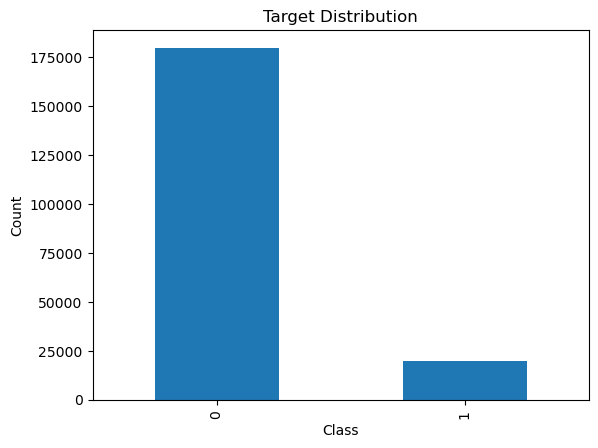

In [12]:
train['target'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The dataset shows a clear class imbalance

In [13]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,...,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,0.662956,-6.725505,9.299858,11.222356,11.569954,8.948289,-12.699667,11.326488,-12.471737,14.704713,...,16.817671,10.141542,7.633199,16.727902,6.974955,-2.074128,13.209272,-4.813552,17.914591,10.223282,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,4.068845,8.279259,5.938088,0.695991,0.309599,5.903073,21.404912,2.860511,10.579862,11.384332,...,2.464157,3.962426,3.005373,2.014200,4.961678,5.771261,0.955140,5.570272,7.885579,4.122912,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.

### Modelling

In [14]:
x=train.drop(columns=['ID_code','target'])
y=train['target']

In [15]:
x_train,x_val, y_train, y_val=train_test_split(x,y, test_size=.20, random_state=42, stratify=y)

### 1th Model LogisticRegression

In [16]:
lr=LogisticRegression(max_iter=1000,class_weight='balanced',n_jobs=-1)

In [17]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
lrtahmin=lr.predict(x_val)

In [19]:
accuracy_score(y_val,lrtahmin)

0.78105

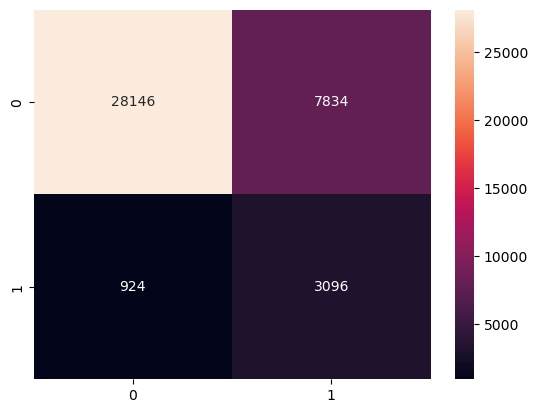

In [20]:
cm=confusion_matrix(y_val, lrtahmin).astype(int)

sns.heatmap(cm, annot=True, fmt='d')
plt.show();

In [21]:
print(classification_report(y_val,lrtahmin))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87     35980
           1       0.28      0.77      0.41      4020

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



In [22]:
y_prob=lr.predict_proba(x_val)[:, 1]
threshold=0.30
y_pred_thr=(y_prob >= threshold).astype(int)

In [23]:
print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_val, y_pred_thr))
print(confusion_matrix(y_val, y_pred_thr))
print(classification_report(y_val, y_pred_thr))

Threshold: 0.3
Accuracy: 0.6146
[[20951 15029]
 [  387  3633]]
              precision    recall  f1-score   support

           0       0.98      0.58      0.73     35980
           1       0.19      0.90      0.32      4020

    accuracy                           0.61     40000
   macro avg       0.59      0.74      0.53     40000
weighted avg       0.90      0.61      0.69     40000



In [24]:
roc_auc=roc_auc_score(y_val, y_prob)
roc_auc

0.8577954377639319

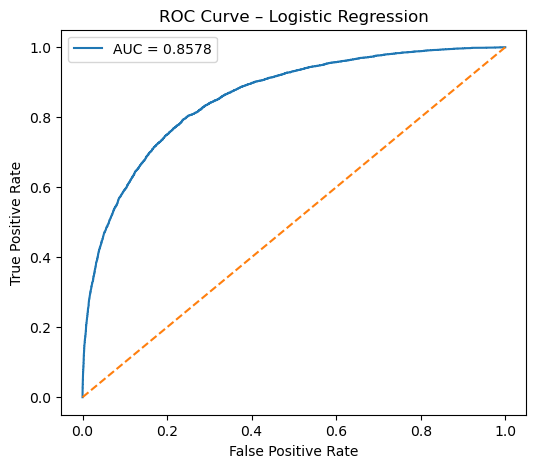

In [37]:
fpr, tpr, _=roc_curve(y_val, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend()
plt.show()

### 2th Model LGBMClassifier

In [25]:
lgbc=lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [27]:
lgbc.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 16078, number of negative: 143922
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,500
,subsample_for_bin,200000
,objective,'binary'
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [28]:
lgbctahmin=lgbc.predict(x_val)

In [29]:
accuracy_score(y_val,lgbctahmin)

0.8529

In [57]:
y_prob_lgbc=lgbc.predict_proba(x_val)[:, 1]

In [58]:
threshold=0.30
y_pred_lgbc=(y_prob_lgbc >= threshold).astype(int)

In [ ]:
roc_auc_lgbc=roc_auc_score(y_val, y_val_prob_lgbc)

In [60]:
print("Threshold:", threshold)
print("Accuracy:", accuracy_score(y_val, y_pred_lgbc))
print(confusion_matrix(y_val, y_pred_lgbc))
print(classification_report(y_val, y_pred_lgbc))

Threshold: 0.3
Accuracy: 0.69785
[[24311 11669]
 [  417  3603]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     35980
           1       0.24      0.90      0.37      4020

    accuracy                           0.70     40000
   macro avg       0.61      0.79      0.59     40000
weighted avg       0.91      0.70      0.76     40000



In [61]:
print(f"LightGBM ROC-AUC: {roc_auc_lgbc:.4f}")

LightGBM ROC-AUC: 0.8888


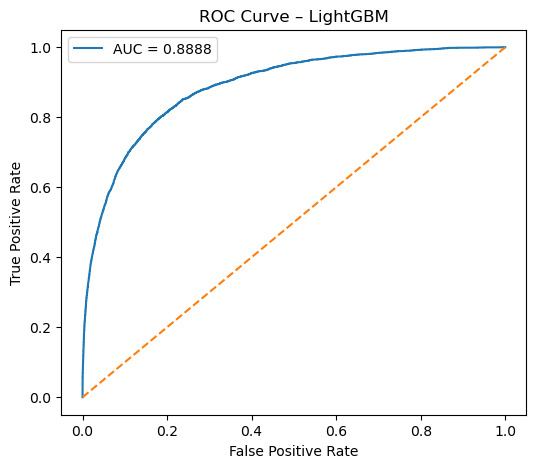

In [38]:
fpr, tpr, _=roc_curve(y_val, y_val_prob_lgbc)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lgbc:.4f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – LightGBM")
plt.legend()
plt.show()

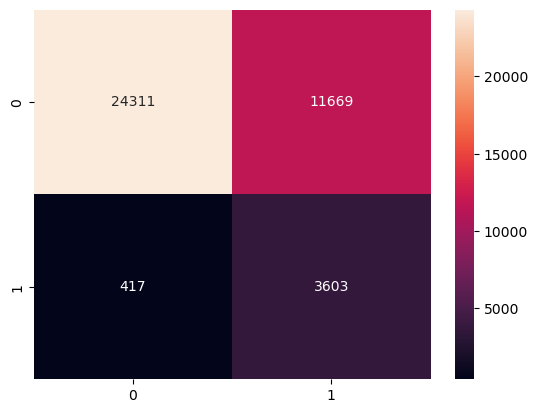

In [63]:
cm=confusion_matrix(y_val, y_pred_lgbc).astype(int)

sns.heatmap(cm, annot=True, fmt='d')
plt.show();

In [65]:
save={'model': lgbc,'features': x.columns.tolist(),'threshold': 0.30}
joblib.dump(save,'lightgbm_santander_save.pkl')

['lightgbm_santander_save.pkl']

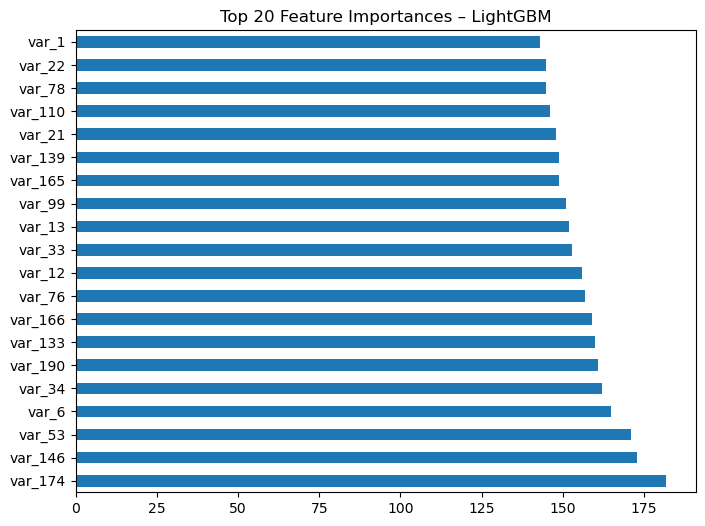

In [54]:
imp=pd.Series(lgbc.feature_importances_, index=x.columns)
imp.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Feature Importances – LightGBM")
plt.show()

LightGBM showed the best overall performance based on ROC-AUC and was chosen as the final model.

### 3th Model XGBClassifier

In [44]:
xgb=XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='auc',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    n_jobs=-1
)

In [45]:
xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [46]:
xgbtahmin=xgb.predict(x_val)

In [47]:
accuracy_score(y_val,xgbtahmin)

0.879075

In [49]:
y_prob_xgb=xgb.predict_proba(x_val)[:, 1]
roc_auc_xgb=roc_auc_score(y_val, y_prob_xgb)

In [51]:
print(f"LightGBM ROC-AUC: {roc_auc_xgb:.4f}")

LightGBM ROC-AUC: 0.8807


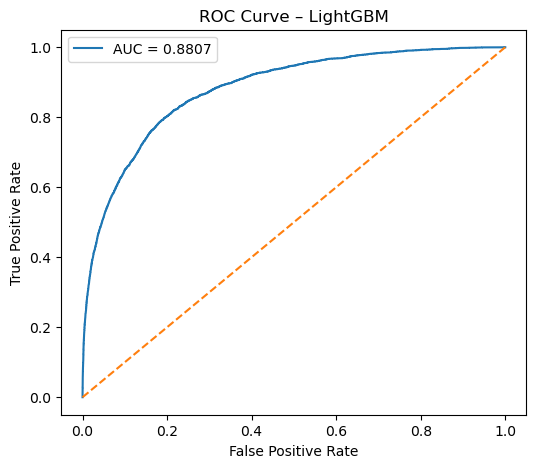

In [52]:
fpr, tpr, _=roc_curve(y_val, y_prob_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_xgb:.4f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – LightGBM")
plt.legend()
plt.show()

### Test Data

In [66]:
testids=test["ID_code"]

In [67]:
test=test.drop(columns=["ID_code"])

In [68]:
test_prob=lgbc.predict_proba(test)[:, 1]

In [69]:
submission=pd.DataFrame({'ID_code': testids,'target': test_prob})
submission.head()

,ID_code,target
0,test_0,0.454843
1,test_1,0.563838
2,test_2,0.552455
3,test_3,0.408692
4,test_4,0.232621


In [70]:
submission.to_csv("submission_lightgbm.csv", index=False)

In [74]:
submission.shape

(200000, 2)

In [73]:
submission.isnull().sum()

ID_code    0
target     0
dtype: int64

In [75]:
test_sample=test.sample(5000, random_state=42)
test_sample.to_csv('test_sample.csv', index=False)

### Conclusion
In this project, different classification models were tested to predict customer transactions. Logistic Regression was used as a baseline model and achieved a ROC-AUC score of about 0.86.

The gradient boosting models performed better. LightGBM achieved the best result with a ROC-AUC score of 0.8888, which was higher than both Logistic Regression and XGBoost. Even though XGBoost had a slightly higher accuracy, ROC-AUC was chosen as the main metric because the dataset is imbalanced.

Therefore, LightGBM was selected as the final model. The model was applied to the test dataset, and probability predictions were created for Kaggle submission. This project shows that choosing the right evaluation metric and model is very important for tabular data.